## 感知机

### 两类问题

In [2]:
import torch
from torchvision.models import AlexNet
from torchviz import make_dot
import matplotlib.pyplot as plt
import numpy as np

xdim =[(-0.1,-0.2),(0.5,0.5),(-0.5,0.2),(-0.25,0.5),(0.2,0.1),(0,0.8)]
ldim =[-1,1,-1,-1,1,1]


Trained weights: [1.05 0.3 ]
Trained bias: 0.0


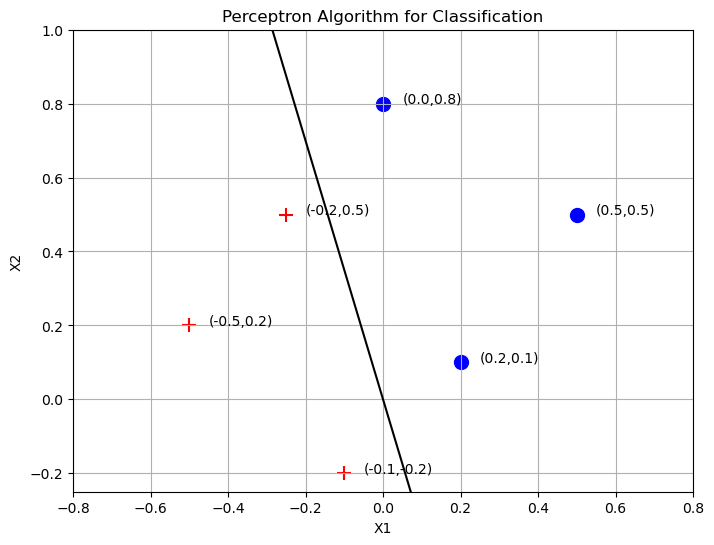

In [3]:
from torch import nn
from torchviz import make_dot

# 转换为 numpy 数组
X = np.array(xdim)
y = np.array(ldim)

# 初始化权重和偏置
w = np.zeros(X.shape[1])
b = 0
eta = 1.0  # 学习率
epochs = 10  # 训练轮数

# 感知机训练过程
for epoch in range(epochs):
    for i in range(len(X)):
        if y[i] * (np.dot(X[i], w) + b) <= 0:
            w += eta * y[i] * X[i]
            b += eta * y[i]
# 绘制感知器的网络结构图

# 定义一个简单的感知器模型
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x)

    # 创建感知器模型实例
perceptron_model = Perceptron(X.shape[1])

    # 绘制网络结构图        
x_sample = torch.tensor(X, dtype=torch.float32)
y_sample = perceptron_model(x_sample)
dot = make_dot(y_sample, params=dict(perceptron_model.named_parameters()))
dot.format = 'png'
dot.render('perceptron_network')

# 打印训练后的权重和偏置
print("Trained weights:", w)
print("Trained bias:", b)

# 绘制数据点和分类结果
plt.figure(figsize=(8, 6))
for x, label in zip(X, y):
    if label == 1:
        plt.scatter(x[0], x[1], marker='o', color='blue', s=100)
    else:
        plt.scatter(x[0], x[1], marker='+', color='red', s=100)
    plt.text(x[0]+0.05,x[1],'(%3.1f,%3.1f)'%(x[0],x[1]))
# 绘制决策边界
x1 = np.linspace(-1, 1, 100)
x2 = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2, 'k-')
plt.axis([-0.8, 0.8,-0.25, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Algorithm for Classification')
plt.grid(True)
plt.show()

### 字母七分类问题

In [4]:
# 
A_1 = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]
B_1 = [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1 ,0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
C_1 = [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]
K_1 = [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1 ,0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
J_1 = [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0 ,0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
E_1 = [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1 ,0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
D_1 = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1 ,0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]

A_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
B_2 = [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
C_2 = [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
K_2 = [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
J_2 = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
E_2 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
D_2 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]

A_3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
B_3 = [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
C_3 = [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
K_3 = [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
J_3 = [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
E_3 = [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
D_3 = [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]

In [5]:
# Basic 
import numpy as np

# 数据点和标签
data = [
    A_1, B_1, C_1, K_1, J_1, E_1, D_1,
    A_2, B_2, C_2, K_2, J_2, E_2, D_2,
    A_3, B_3, C_3, K_3, J_3, E_3, D_3
]

# 标签，假设每个字符的标签是从0到6
labels = [0, 1, 2, 3, 4, 5, 6] * 3
label_to_char = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'K',
    4: 'J',
    5: 'E',
    6: 'D'
}
def training(data,labels):
    X = np.array(data)
    y = np.array(labels)
    # 初始化权重和偏置
    num_classes = 7
    num_features = X.shape[1]
    weights = np.zeros((num_classes, num_features))
    biases = np.zeros(num_classes)
    eta = 0.1  # learning rate
    epochs = 10  # epochs
    # Training
    for epoch in range(epochs):
        for i in range(len(X)):
            for c in range(num_classes):
                if (y[i] == c and np.dot(X[i], weights[c]) + biases[c] <= 0) or (y[i] != c and np.dot(X[i], weights[c]) + biases[c] > 0):
                    weights[c] += eta * (y[i] == c) * X[i]
                    biases[c] += eta * (y[i] == c)
    return weights,biases

# print("Trained weights:\n", weights)
# print("Trained biases:\n", biases)

# 测试感知机模型
def predict(x,weights,biases):
    scores = np.dot(weights, x) + biases
    return np.argmax(scores)

def test_perceptron(test_data, test_labels, weights, biases):
    correct = 0
    for i, x in enumerate(test_data):
        predicted = predict(x, weights, biases)
        true_label = test_labels[i]
        # print(f"Test {i+1}: Predicted class = {label_to_char[predicted]}, True class = {label_to_char[true_label]}")
        if predicted == true_label:
            correct += 1
    accuracy = correct / len(test_data)
    print(f"Accuracy: {accuracy * 100:.2f}%")

# 定义分类接口
def classify(input_array,weights,biases):
    predicted_label = predict(input_array, weights, biases)
    predicted_char = label_to_char[predicted_label]
    print(f"Input: {input_array}")
    print(f"Predicted class: {predicted_char}")
    # return predicted_char
    
weights,biases = training(data,labels)
test_perceptron(data, labels, weights, biases)
test_normal = [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]

classify(test_normal,weights,biases)

test_one_noise = [0, 0, 1, 1, 1, 0, 1, 0, -1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
classify(test_one_noise,weights,biases)

Accuracy: 95.24%
Input: [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
Predicted class: C
Input: [0, 0, 1, 1, 1, 0, 1, 0, -1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
Predicted class: C


In [6]:
test_two_noise = [0, 0, 1, 1, 1, 1, 1, 0, -1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
classify(test_two_noise,weights,biases)

Input: [0, 0, 1, 1, 1, 1, 1, 0, -1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
Predicted class: C


In [7]:
data_lack = [A_1, B_1, C_1, K_1, J_1, E_1, D_1]
weights_1,biases_1 = training(data_lack,labels)
test_perceptron(data_lack, labels, weights_1, biases_1)
classify(test_two_noise,weights_1,biases_1)

Accuracy: 100.00%
Input: [0, 0, 1, 1, 1, 1, 1, 0, -1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]
Predicted class: C
